In [1]:
import pickle
class Index:
   def __init__(self, date, index_name, company, index_type, rating, price, fluct_rate):
       self.date = date
       self.index_name = index_name
       self.company = company
       self.type = index_type
       self.rating = rating
       self.price = price
       self.fluct_rate = fluct_rate
       self.unique_id = id(self)
   def __str__(self):
       return f"{self.unique_id},{self.date},{self.index_name},{self.company},{self.type},{self.rating},{self.price},{self.fluct_rate}"
class LargeCapIndex(Index):
   def __init__(self, date, index_name, company, rating, price, fluct_rate):
       super().__init__(date, index_name, company, "LargeCap", rating, price, fluct_rate)
class NonLargeCapIndex(Index):
   def __init__(self, date, index_name, company, rating, price, fluct_rate):
       super().__init__(date, index_name, company, "non-LargeCap", rating, price, fluct_rate)
class SNP(LargeCapIndex):
   def __init__(self, date, index_name, rating, price, fluct_rate):
       super().__init__(date, index_name, "SNP", rating, price, fluct_rate)
class DJ(NonLargeCapIndex):
   def __init__(self, date, index_name, rating, price, fluct_rate):
       super().__init__(date, index_name, "DJ", rating, price, fluct_rate)
class NASDAQ(NonLargeCapIndex):
   def __init__(self, date, index_name, rating, price, fluct_rate):
       super().__init__(date, index_name, "NASDAQ", rating, price, fluct_rate)
# Test cases
DJIndex = DJ("2022-11-15", "index_nameA", 2, 641, 86.06)
print(str(DJIndex))
with open("Indexpkl50102.dat",'rb') as fb:
  try:
    while(True):
      objects = pickle.load(fb)
      print(len(objects))
  except EOFError:
    pass
with open('data.csv', 'w') as f:
 f.write("uniqueId,date,index_name,company,type,rating,price,fluct_rate\n")
 for obj in objects:
  f.write(str(obj)+'\n')

2593211976080,2022-11-15,index_nameA,DJ,non-LargeCap,2,641,86.06
10000


Introduction

The data set contains information about different companies’ financial fluctuations over a while by noticing the change in the price of their stocks followed by the change in price. To begin with, the dataset has 10000 rows of data with the following columns:

•	uniqueID -> It can be identified as the primary key in the dataset to uniquely identify each record in the table.
•	date -> The date column ranges from January 2022 to January 2023 helping us identify stock prices and fluctuations of certain companies on different dates. 
•	index_name -> The name of the stock index.
•	company -> The different companies that were taken into consideration in the dataset to which the stock indexes belonged.
•	type -> This tells us the type of the stock market index eg: large cap or nonlarge cap. 
•	rating -> It ranges from 1-5 which speaks about the rating of the company.
•	price -> the stock price of the company or the index.
•	fluct_rate -> The fluctuation rate regarding the change of price of the stock over the given dates.

Data types: 

Column:	      Data Type:
uniqueID	  int 64
date	      object
company	      object
index_name	  object
type	      object
rating	      float 64
price	      float 64
fluct_rate	  float 64

In a nutshell, the data types are a mix of numerical (int, float) and categorical/text (object) values.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
project_data = pd.read_csv("data.csv")
project_data = project_data[0:10000]
project_data

,uniqueId,date,index_name,company,type,rating,price,fluct_rate
0,134289279133792,2022-05-20,D30,DJ,non-LargeCap,1.0,214.0,6.44
1,134289279128416,2022-10-02,SOX,NASDAQ,non-LargeCap,3.0,111.0,7.71
2,134289279128176,2022-11-05,SOX,NASDAQ,non-LargeCap,3.0,215.0,18.03
3,134289279127888,2022-06-09,IA,DJ,non-LargeCap,3.0,150.0,18.05
4,134289279134224,2022-06-12,500,SNP,LargeCap,3.0,106.0,6.19
...,...,...,...,...,...,...,...,...
9995,134289271780880,2022-06-09,D30,DJ,non-LargeCap,4.0,114.0,13.10
9996,134289271780928,NaN,NDX,NASDAQ,non-LargeCap,3.0,108.0,11.72
9997,134289271780976,2022-05-29,IA,DJ,non-LargeCap,4.0,126.0,13.33
9998,134289271781024,2022-09-26,NDX,NASDAQ,non-LargeCap,3.0,126.0,7.55


In [4]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uniqueId    10000 non-null  int64  
 1   date        9586 non-null   object 
 2   index_name  10000 non-null  object 
 3   company     10000 non-null  object 
 4   type        10000 non-null  object 
 5   rating      9537 non-null   float64
 6   price       9543 non-null   float64
 7   fluct_rate  9574 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 625.1+ KB


In [5]:
project_data.isna().sum()

uniqueId        0
date          414
index_name      0
company         0
type            0
rating        463
price         457
fluct_rate    426
dtype: int64

In [6]:
project_data.isnull().sum()

uniqueId        0
date          414
index_name      0
company         0
type            0
rating        463
price         457
fluct_rate    426
dtype: int64

Handling Missing Data:

•	An initial exploration showed there were some missing values in the date, rating, price, and fluct_rate columns. 

•	In terms of handling these missing values, all the numerical values were replaced with the median of the non–null values. The median was considered instead of the mean to make sure the replaced values were not affected by the outliers. 

•	For the date column, the statistical value mode was taken by replacing the null values with the most frequent date in the entire dataset. 


In [7]:
project_data['rating'] = project_data['rating'].fillna(project_data['rating'].median()) 

In [8]:
project_data['price'] = project_data['price'].fillna(project_data['price'].median()) 
project_data['fluct_rate'] = project_data['fluct_rate'].fillna(project_data['fluct_rate'].median()) 

In [9]:
project_data.isnull().sum()

uniqueId        0
date          414
index_name      0
company         0
type            0
rating          0
price           0
fluct_rate      0
dtype: int64

In [10]:
project_data['date'] = pd.to_datetime(project_data['date']) 

# Finding the most frequent date
most_common_date = project_data['date'].value_counts().idxmax()

print("Most frequently occurring date:", most_common_date)

Most frequently occurring date: 2022-07-25 00:00:00


In [11]:
default_date = pd.to_datetime('2022-08-17') #Replacing all the null data values with the mode or with the most occured date
project_data['date'].fillna(default_date, inplace=True)

In [12]:
project_data.isnull().sum()

uniqueId      0
date          0
index_name    0
company       0
type          0
rating        0
price         0
fluct_rate    0
dtype: int64

In [13]:
project_data.to_excel('output.xlsx', index=False) 

Visualizations and Trends:

1. Line chart showing price overtime: Prices tend to increase over the year 2022 but with some periodic drops. There is noticeable volatility.

2. Scatter plot of rating vs price: There is a weak positive correlation between higher prices and increased rating.

3. Bar chart of the total number of companies: There is a higher count of non-large cap companies than the large-cap companies. 

4. Pie chart of company counts: NASDAQ indexes make up the highest percentage followed by Dow Jones and S&P.  

5. Box plot of prices by company type: Large-cap indexes and non-large indexes have almost the same median and equal spread of prices.

6. Histogram of fluctuation rate:   Markets fluctuate fairly frequently. The average fluctuation is about 15% during a year.

7. Heatmap of price changes: For all three indices, ratings 2, 3 and 4 are more common than ratings 1 and 5, with 3 being the most common rating for all three indices.


Plot: Bar Graph 

Objective: Visualize the total number of companies in terms of count and in terms of their type

Inference: 
 
We can infer from the graph that there are a total of 3 companies with almost an equal number present in our dataset. The three companies are SNP, NASDAQ, DJ followed with a count between the range of 1500-1750. 

This shows that almost an equal number of instances of 3 different companies have been considered with regards to their stock price and fluctuation rate.  

However, while taking into consideration the types( Large cap and Non large cap) of the company, there seems to be a dominant presence of more non-large companies than the large-cap type. 
 

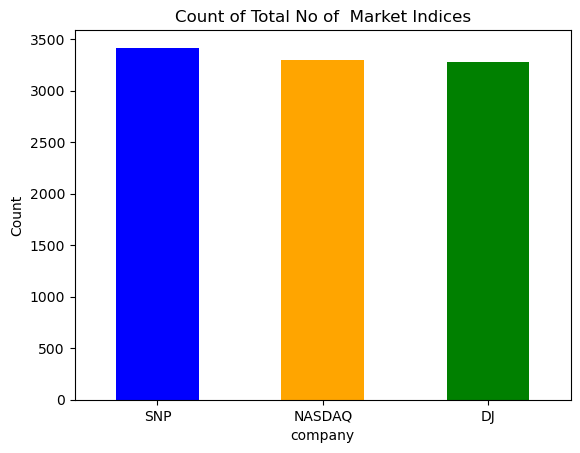

In [14]:
#Bar chart 
# Counting the number of companies for each company type
company_type_counts = project_data['company'].value_counts()
 
# Plotting a bar chart
company_type_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
 
plt.title('Count of Total No of  Market Indices')
plt.xlabel('company')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

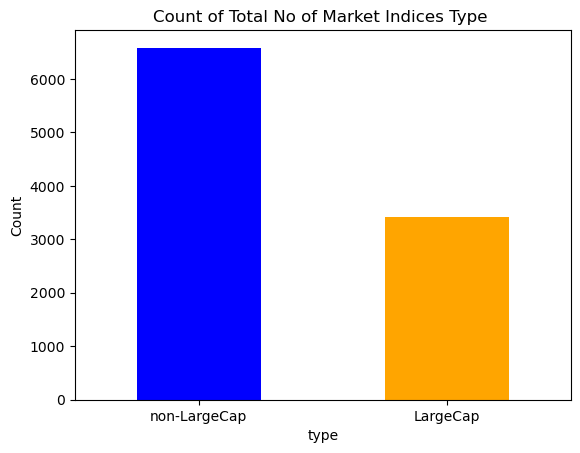

In [15]:
#Bar chart 
# Counting the number of companies for each company type
company_type_counts = project_data['type'].value_counts()
 
# Plotting a bar chart
company_type_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
 
plt.title('Count of Total No of Market Indices Type ')
plt.xlabel('type')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

Plot: Pie Chart Distribution of Category

Objective: Visualize the relationship between companies’ performance levels

Data Points: 
•	Count the occurrences of each category.
•	Percentage represents the distribution of rating. 
•	Rating status 

Trend: 
The companies are categorized by performance levels. A slice represents each company, and the size of each slide corresponds to the percentage of the whole. 

Inference:
This Pie chart distributes the companies by their category and their performance. Each category represents a specific aspect of criteria by which companies are classified. The performance of each company is depicted by the percentage of the pie slice. The higher percentage of the slice of the pie chart suggests that a significant proportion of companies fall into the high-performance category. The lower percentage slice of the pie chart indicates that fewer companies perform well in that category. 


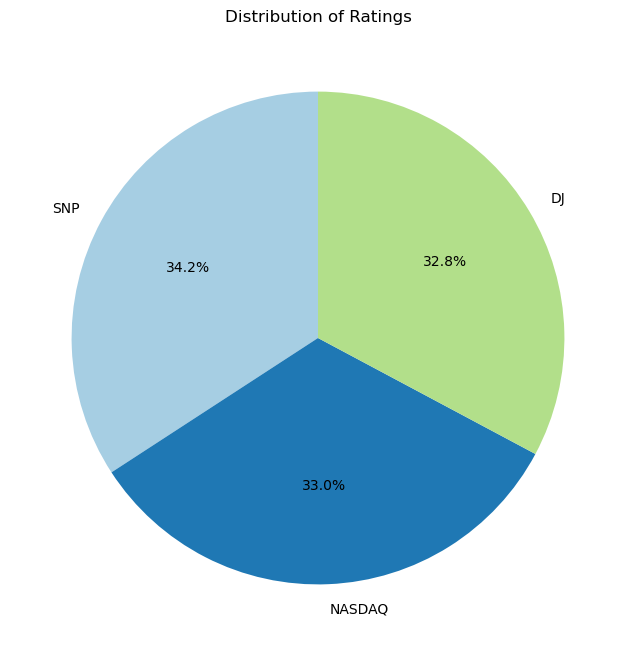

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from Excel file
df = pd.read_excel('output.xlsx')

# Extract the column for the pie chart
ratings = df['company']

# Count the occurrences of each rating
rating_counts = ratings.value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Ratings')
plt.show()

Plot: Box Plot 

Objective: Visualize the distribution of price of stocks concerning company type

Inference: 
 
We can infer from the graph that the price of the stock prices is distributed within a range of 100 – 250 which shows the maximum increase in the prices of the stock is around 250 dollars and there is a rare occurrence beyond 250 dollars and further considered as outliers. The median price of the stock is approximately 140.
The type of company has no causal effect on the price of their shares and almost remains the same. 


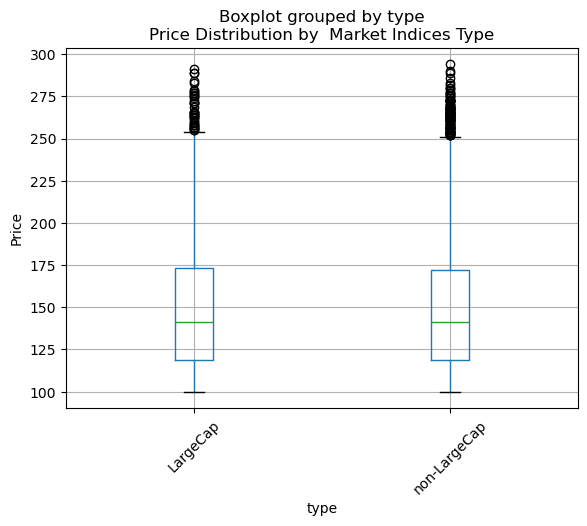

In [17]:
# Creating box plots for 'price' grouped by 'company'
project_data.boxplot(column='price', by='type')
 
plt.title('Price Distribution by  Market Indices Type')
plt.xlabel('type')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

 
# Show the plot
plt.show()

Line chart: 
Comparing price trends of different indices over the year 2022.

Introduction: 
The line charts show the price trend of the average price of all the companies within the indices NASDAQ, SNP, and DJ. Every point on the x-axis represents a month in the year 2022. The first chart compares a large cap index with a non-large index SNP and NASDAQ, respectively. While the second chart compares two non-large indices NASDAQ and DJ.

Slicing the data-
•	The data is first split into months.
•	Indices are then segregated based on their name like NASDAQ, SNP and DJ.
•	Mean for these indices for each month is then calculated and plotted over each month comparing them for different indices.
Trend:
•	Prices tend to increase over the years but with some periodic drops.
•	There is noticeable volatility.
Inference:
•	Both the non-large cap indexes tend to move in similar trends, they rise and dip in the same months.
•	Having a large cap doesn’t necessarily mean the company will outperform a company with a non-large cap.


In [18]:
#Slicing the dataframe according to months
df_jan = df[(df['date'] > "2022-01-01") & (df['date'] < "2022-01-31")]
df_feb = df[(df['date'] > "2022-02-01") & (df['date'] < "2022-02-27")]
df_mar = df[(df['date'] > "2022-03-01") & (df['date'] < "2022-03-31")]
df_apr = df[(df['date'] > "2022-04-01") & (df['date'] < "2022-04-30")]
df_may = df[(df['date'] > "2022-05-01") & (df['date'] < "2022-05-31")]
df_jun = df[(df['date'] > "2022-06-01") & (df['date'] < "2022-06-30")]
df_jul = df[(df['date'] > "2022-07-01") & (df['date'] < "2022-07-31")]
df_aug = df[(df['date'] > "2022-08-01") & (df['date'] < "2022-08-31")]
df_sep = df[(df['date'] > "2022-09-01") & (df['date'] < "2022-09-30")]
df_oct = df[(df['date'] > "2022-10-01") & (df['date'] < "2022-10-31")]
df_nov = df[(df['date'] > "2022-11-01") & (df['date'] < "2022-11-30")]
df_dec = df[(df['date'] > "2022-12-01") & (df['date'] < "2022-12-31")]
df_jun

,uniqueId,date,index_name,company,type,rating,price,fluct_rate
3,134289279127888,2022-06-09,IA,DJ,non-LargeCap,3,150,18.05
4,134289279134224,2022-06-12,500,SNP,LargeCap,3,106,6.19
9,134289279132880,2022-06-22,DSI,DJ,non-LargeCap,2,268,11.80
16,134289279135472,2022-06-17,300,SNP,LargeCap,3,116,15.00
23,134289279134896,2022-06-26,SOX,NASDAQ,non-LargeCap,5,165,13.37
...,...,...,...,...,...,...,...,...
9943,134289271778384,2022-06-13,SOX,NASDAQ,non-LargeCap,3,105,17.14
9978,134289271780064,2022-06-20,400,SNP,LargeCap,4,168,18.48
9984,134289271780352,2022-06-11,300,SNP,LargeCap,3,112,8.27
9995,134289271780880,2022-06-09,D30,DJ,non-LargeCap,4,114,13.10


In [19]:
#Filtering NASDAQ indexes from the sliced dataframe.
jan_NAS=df_jan[(df_jan['company']=="NASDAQ")]
feb_NAS=df_feb[(df_feb['company']=="NASDAQ")]
mar_NAS=df_mar[(df_mar['company']=="NASDAQ")]
apr_NAS=df_apr[(df_apr['company']=="NASDAQ")]
may_NAS=df_may[(df_may['company']=="NASDAQ")]
jun_NAS=df_jun[(df_jun['company']=="NASDAQ")]
jul_NAS=df_jul[(df_jul['company']=="NASDAQ")]
aug_NAS=df_aug[(df_aug['company']=="NASDAQ")]
sep_NAS=df_sep[(df_sep['company']=="NASDAQ")]
oct_NAS=df_oct[(df_oct['company']=="NASDAQ")]
nov_NAS=df_nov[(df_nov['company']=="NASDAQ")]
dec_NAS=df_dec[(df_dec['company']=="NASDAQ")]


In [20]:
#CAlculating mean of index prices for NASDAQ for each month
NAS01 = jan_NAS["price"].mean()
NAS02 = feb_NAS["price"].mean()
NAS03 = mar_NAS["price"].mean()
NAS04 = apr_NAS["price"].mean()
NAS05 = may_NAS["price"].mean()
NAS06 = jun_NAS["price"].mean()
NAS07 = jul_NAS["price"].mean()
NAS08 = aug_NAS["price"].mean()
NAS09 = sep_NAS["price"].mean()
NAS10 = oct_NAS["price"].mean()
NAS11 = nov_NAS["price"].mean()
NAS12 = dec_NAS["price"].mean()


In [21]:
#Filtering SNP indexes from the sliced dataframe.
jan_SNP=df_jan[(df_jan['company']=="SNP")]
feb_SNP=df_feb[(df_feb['company']=="SNP")]
mar_SNP=df_mar[(df_mar['company']=="SNP")]
apr_SNP=df_apr[(df_apr['company']=="SNP")]
may_SNP=df_may[(df_may['company']=="SNP")]
jun_SNP=df_jun[(df_jun['company']=="SNP")]
jul_SNP=df_jul[(df_jul['company']=="SNP")]
aug_SNP=df_aug[(df_aug['company']=="SNP")]
sep_SNP=df_sep[(df_sep['company']=="SNP")]
oct_SNP=df_oct[(df_oct['company']=="SNP")]
nov_SNP=df_nov[(df_nov['company']=="SNP")]
dec_SNP=df_dec[(df_dec['company']=="SNP")]

In [22]:
#CAlculating mean of index prices for SNP for each month
SNP01 = jan_SNP["price"].mean()
SNP02 = feb_SNP["price"].mean()
SNP03 = mar_SNP["price"].mean()
SNP04 = apr_SNP["price"].mean()
SNP05 = may_SNP["price"].mean()
SNP06 = jun_SNP["price"].mean()
SNP07 = jul_SNP["price"].mean()
SNP08 = aug_SNP["price"].mean()
SNP09 = sep_SNP["price"].mean()
SNP10 = oct_SNP["price"].mean()
SNP11 = nov_SNP["price"].mean()
SNP12 = dec_SNP["price"].mean()

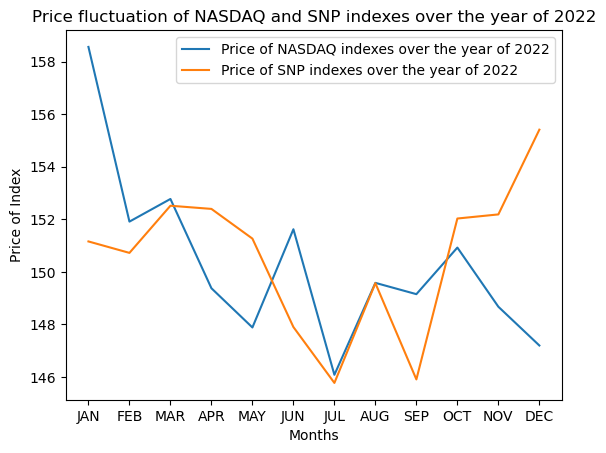

In [23]:
# x-axis data
months= ['JAN', 'FEB', 'MAR', 'APR', 'MAY','JUN', 'JUL', 'AUG', 'SEP', 'OCT','NOV','DEC']
# line 1 data
NASDAQ = [NAS01,NAS02,NAS03,NAS04,NAS05,NAS06,NAS07,NAS08,NAS09,NAS10,NAS11,NAS12]
# line 2 data
SNP = [SNP01,SNP02,SNP03,SNP04,SNP05,SNP06,SNP07,SNP08,SNP09,SNP10,SNP11,SNP12]
# plot the first line. The label parameter is used to generate a legend to distinguish to identif
plt.plot(months, NASDAQ, label = "Price of NASDAQ indexes over the year of 2022")
# plot the second line. Provide a label for this line as well
plt.plot(months, SNP, label = "Price of SNP indexes over the year of 2022")
# name the x axis
plt.xlabel('Months')
# name the y axis
plt.ylabel('Price of Index')
# give a title to the graph
plt.title('Price fluctuation of NASDAQ and SNP indexes over the year of 2022')
plt.legend(loc='best')
# function to show the plot
plt.show()


In [24]:
#Filtering DJ indexes from the sliced dataframe.
jan_DJ=df_jan[(df_jan['company']=="DJ")]
feb_DJ=df_feb[(df_feb['company']=="DJ")]
mar_DJ=df_mar[(df_mar['company']=="DJ")]
apr_DJ=df_apr[(df_apr['company']=="DJ")]
may_DJ=df_may[(df_may['company']=="DJ")]
jun_DJ=df_jun[(df_jun['company']=="DJ")]
jul_DJ=df_jul[(df_jul['company']=="DJ")]
aug_DJ=df_aug[(df_aug['company']=="DJ")]
sep_DJ=df_sep[(df_sep['company']=="DJ")]
oct_DJ=df_oct[(df_oct['company']=="DJ")]
nov_DJ=df_nov[(df_nov['company']=="DJ")]
dec_DJ=df_dec[(df_dec['company']=="DJ")]

In [25]:
#CAlculating mean of index prices for DJ for each month
DJ01 = jan_DJ["price"].mean()
DJ02 = feb_DJ["price"].mean()
DJ03 = mar_DJ["price"].mean()
DJ04 = apr_DJ["price"].mean()
DJ05 = may_DJ["price"].mean()
DJ06 = jun_DJ["price"].mean()
DJ07 = jul_DJ["price"].mean()
DJ08 = aug_DJ["price"].mean()
DJ09 = sep_DJ["price"].mean()
DJ10 = oct_DJ["price"].mean()
DJ11 = nov_DJ["price"].mean()
DJ12 = dec_DJ["price"].mean()

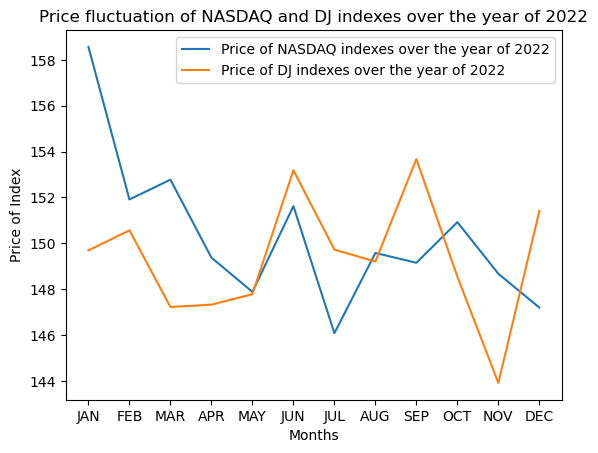

In [26]:
# x-axis data
months= ['JAN', 'FEB', 'MAR', 'APR', 'MAY','JUN', 'JUL', 'AUG', 'SEP', 'OCT','NOV','DEC']
# line 1 data
NASDAQ = [NAS01,NAS02,NAS03,NAS04,NAS05,NAS06,NAS07,NAS08,NAS09,NAS10,NAS11,NAS12]
# line 2 data
SNP = [DJ01,DJ02,DJ03,DJ04,DJ05,DJ06,DJ07,DJ08,DJ09,DJ10,DJ11,DJ12]
# plot the first line. The label parameter is used to generate a legend to distinguish to identif
plt.plot(months, NASDAQ, label = "Price of NASDAQ indexes over the year of 2022")
# plot the second line. Provide a label for this line as well
plt.plot(months, SNP, label = "Price of DJ indexes over the year of 2022")
# name the x axis
plt.xlabel('Months')
# name the y axis
plt.ylabel('Price of Index')
# give a title to the graph
plt.title('Price fluctuation of NASDAQ and DJ indexes over the year of 2022')
plt.legend(loc='best')
# function to show the plot
plt.show()

Heatmap: 
Rating Frequencies by Indices

Objective: 
Based on the given statistics, the heatmap shows a study of the rating frequencies by index. Data on different financial indices, firms, kinds, ratings, costs, and fluctuation rates are all included in the dataset. Visually examining how ratings are distributed among the indices is the goal.

Inference:
I.	Distribution of Ratings:
•	Compared to rating 1, ratings 2, 3, and 4 are more prevalent.
•	The rating that is most given on DJ, NASDAQ, and SNP is 3.
•	
II.	Business-Rating Relationship:
•	In every case, DJ, NASDAQ, and SNP get comparable ratings with SNP having a higher frequency of ratings 2,3 and 4 than DJ and NASDAQ.
•	For all three of the companies, the most common rating is 3.
•	From this we can say that investments made in all 3 indices can be considered as having the same level of risk associated with it as the most common rating associated with all of them is 3.


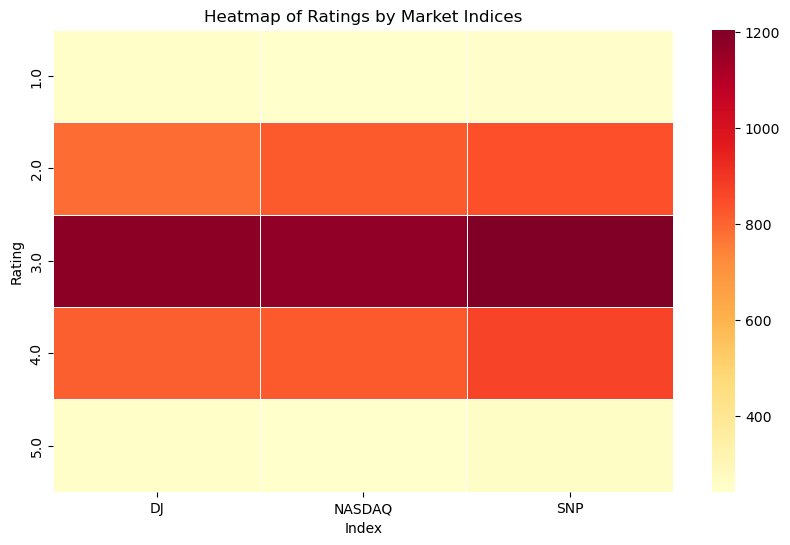

In [27]:
import seaborn as sns

freq_table = pd.crosstab(project_data['rating'], project_data['company'])

plt.figure(figsize=(10, 6))
sns.heatmap(freq_table, annot=False, cmap='YlOrRd', linewidths=.6)
plt.title('Heatmap of Ratings by Market Indices')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.show()

Histogram: 
Visualizing fluctuation rate.

Trend:
Markets fluctuate fairly frequently. As can be seen from the graph that the fluctuation rate is centered at 15%. This is something that can be observed in stock markets in general.

Inference:
The stock market fluctuates for several different reasons, but the biggest overall factor is supply and demand. Prices of stocks rise when the supply of shares for sale is not enough to meet investors’ demands. When investors’ demand for shares falls, so does the price of the shares. This causes volatility.



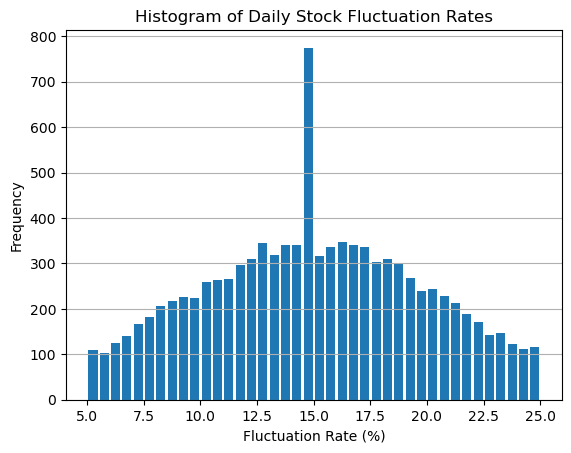

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data
df = pd.read_excel('output.xlsx')

# Filter to just the fluctuate rate column 
fluct_rates = df['fluct_rate']

# Set bins from min to max value by 0.5% increments  
min_rate = fluct_rates.min()
max_rate = fluct_rates.max()
bin_edges = np.arange(min_rate, max_rate + 0.5, 0.5) 

# Plot histogram
plt.hist(fluct_rates, bins=bin_edges, rwidth=0.8)

plt.title('Histogram of Daily Stock Fluctuation Rates')
plt.xlabel('Fluctuation Rate (%)')
plt.ylabel('Frequency')

plt.grid(axis='y')

plt.show()

Plot: 
Scatter Plot of Index Price vs Rating

Objective: 
Visualize the relationship between index price and rating
 
Data Points:
Each point represents an index observation.
Point color indicates index type.
Point size indicates fluctuation rate.

Trend:
There is a weak positive correlation between price and rating, where higher priced indexes tend to have slightly higher ratings.

Insights:
Large cap indexes dominate the higher price tiers
Non large cap indexes show inconsistent ratings despite lower prices

Inference:
The scatter plot shows a minor relationship between increased index price and higher ratings. This suggests investors may associate very high prices with quality when evaluating indexes. However, lower rated large caps are rare so the price-rating correlation is not extremely strong.
This visualization and analysis reveals that index ratings are driven by more than just price, though higher prices may contribute slightly to better perceptions. Additional factors are likely at play in determining ratings.


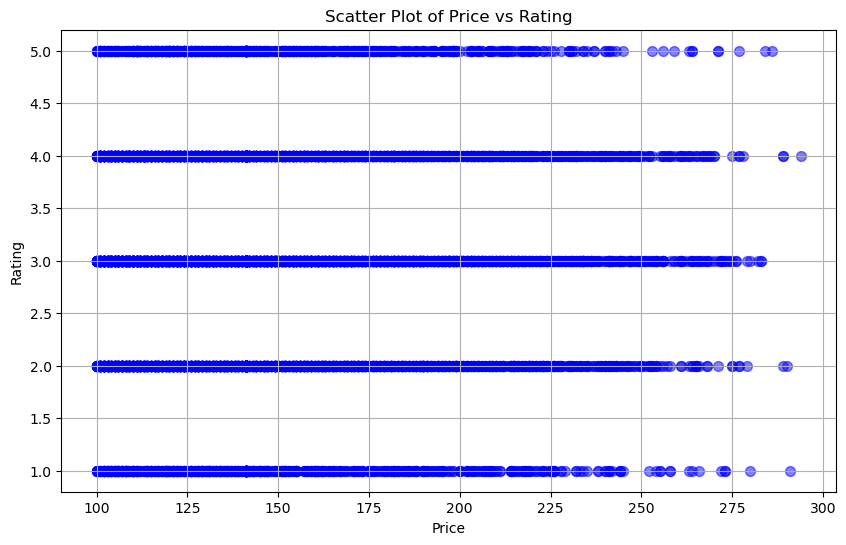

In [29]:
# Price vs Rating: This would show if higher priced indexes tend to have higher or lower ratings
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('output.xlsx')

x = df['price']
y = df['rating']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=50, c='blue', marker='o', alpha=0.5)

plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Scatter Plot of Price vs Rating')  

plt.grid(True)
plt.show()